In [11]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [12]:
sampling_rate = 250

## Load EEG


In [13]:
eeg_df = pd.read_csv('eeg_df.csv')
eeg_df

,FZ,C3,CZ,C4,PZ,PO7,OZ,PO8,AUX_1,AUX_2,AUX_3,AUX_4,AUX_5,AUX_6,AUX_7,AUX_8,AUX_9
0,-150246.11,-139471.31,-169765.62,-154886.69,-34824.110,4304.0522,-18094.900,85135.560,-0.020508,0.967773,-0.053955,0.030518,-0.579834,-0.244141,93.33334,23388.0,1.0
1,-150286.61,-139561.80,-169740.86,-154901.34,-34824.110,4278.4820,-18076.662,85131.805,-0.020020,0.966309,-0.056152,0.091553,-0.640869,-0.274658,93.33334,23389.0,1.0
2,-149976.38,-139160.98,-169704.20,-154696.61,-34737.473,4416.3470,-18048.945,85218.350,-0.020752,0.967041,-0.053467,0.091553,-0.640869,-0.244141,93.33334,23390.0,1.0
3,-149873.02,-138968.94,-169728.06,-154640.19,-34715.660,4482.3296,-18062.445,85243.836,-0.022461,0.966064,-0.053955,0.183105,-0.701904,-0.152588,93.33334,23391.0,1.0
4,-150035.11,-139166.80,-169765.00,-154757.77,-34772.254,4406.7810,-18088.910,85188.130,-0.022461,0.967529,-0.051514,0.244141,-0.793457,-0.152588,93.33334,23392.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53709,-155142.03,-143221.22,-177161.19,-159815.88,-37897.562,-3078.1929,-18402.460,86526.110,-0.006104,0.957764,-0.101562,-0.396728,-0.915527,-0.396728,93.33334,77097.0,1.0
53710,-155283.56,-143390.20,-177193.90,-159913.06,-37943.610,-3135.1453,-18425.260,86482.480,-0.006104,0.958496,-0.099121,-0.457764,-0.946045,-0.305176,93.33334,77098.0,1.0
53711,-155473.11,-143665.39,-177197.48,-160029.20,-37990.727,-3220.0818,-18426.332,86434.470,-0.008545,0.957764,-0.100830,-0.549316,-0.976562,-0.274658,93.33334,77099.0,1.0
53712,-155530.06,-143772.60,-177172.98,-160056.02,-37996.895,-3249.8545,-18410.328,86423.740,-0.007812,0.958008,-0.100098,-0.549316,-0.885010,-0.366211,93.33334,77100.0,1.0


## Plot EEG


### Electrode Channels, Heatmap


In [14]:
def plot_heatmap(df_col):
    plt.figure(figsize=(15, 8))

    sns.heatmap(df_col.values.reshape(-1, 1).T, cmap='viridis')

    plt.title(f'EEG Channel Amplitude Heatmap for {df_col.name}')

    plt.xlabel('Time (seconds)')

    plt.show()

In [15]:
ch = ['FZ', 'C3', 'CZ', 'C4', 'PZ', 'PO7', 'OZ', 'PO8']

In [16]:
eeg_df

,FZ,C3,CZ,C4,PZ,PO7,OZ,PO8,AUX_1,AUX_2,AUX_3,AUX_4,AUX_5,AUX_6,AUX_7,AUX_8,AUX_9
0,-150246.11,-139471.31,-169765.62,-154886.69,-34824.110,4304.0522,-18094.900,85135.560,-0.020508,0.967773,-0.053955,0.030518,-0.579834,-0.244141,93.33334,23388.0,1.0
1,-150286.61,-139561.80,-169740.86,-154901.34,-34824.110,4278.4820,-18076.662,85131.805,-0.020020,0.966309,-0.056152,0.091553,-0.640869,-0.274658,93.33334,23389.0,1.0
2,-149976.38,-139160.98,-169704.20,-154696.61,-34737.473,4416.3470,-18048.945,85218.350,-0.020752,0.967041,-0.053467,0.091553,-0.640869,-0.244141,93.33334,23390.0,1.0
3,-149873.02,-138968.94,-169728.06,-154640.19,-34715.660,4482.3296,-18062.445,85243.836,-0.022461,0.966064,-0.053955,0.183105,-0.701904,-0.152588,93.33334,23391.0,1.0
4,-150035.11,-139166.80,-169765.00,-154757.77,-34772.254,4406.7810,-18088.910,85188.130,-0.022461,0.967529,-0.051514,0.244141,-0.793457,-0.152588,93.33334,23392.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53709,-155142.03,-143221.22,-177161.19,-159815.88,-37897.562,-3078.1929,-18402.460,86526.110,-0.006104,0.957764,-0.101562,-0.396728,-0.915527,-0.396728,93.33334,77097.0,1.0
53710,-155283.56,-143390.20,-177193.90,-159913.06,-37943.610,-3135.1453,-18425.260,86482.480,-0.006104,0.958496,-0.099121,-0.457764,-0.946045,-0.305176,93.33334,77098.0,1.0
53711,-155473.11,-143665.39,-177197.48,-160029.20,-37990.727,-3220.0818,-18426.332,86434.470,-0.008545,0.957764,-0.100830,-0.549316,-0.976562,-0.274658,93.33334,77099.0,1.0
53712,-155530.06,-143772.60,-177172.98,-160056.02,-37996.895,-3249.8545,-18410.328,86423.740,-0.007812,0.958008,-0.100098,-0.549316,-0.885010,-0.366211,93.33334,77100.0,1.0


In [17]:
eeg_df.columns

Index(['FZ', 'C3', 'CZ', 'C4', 'PZ', 'PO7', 'OZ', 'PO8', 'AUX_1', 'AUX_2',
       'AUX_3', 'AUX_4', 'AUX_5', 'AUX_6', 'AUX_7', 'AUX_8', 'AUX_9'],
      dtype='object')

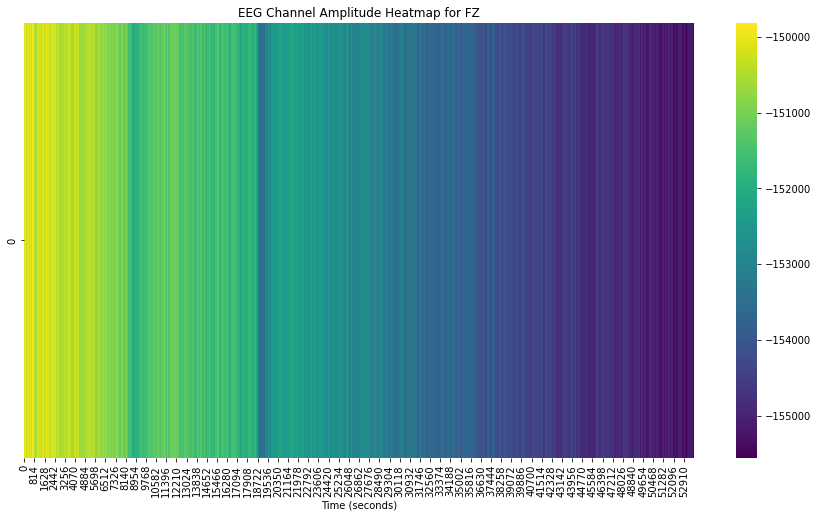

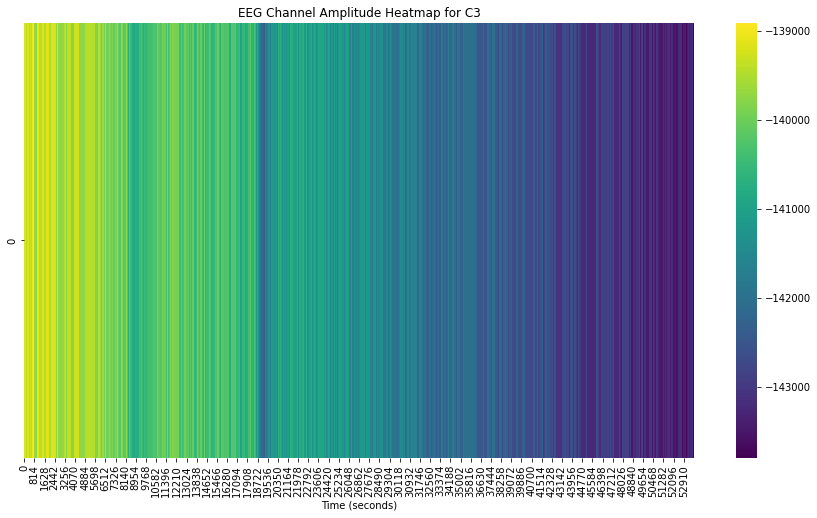

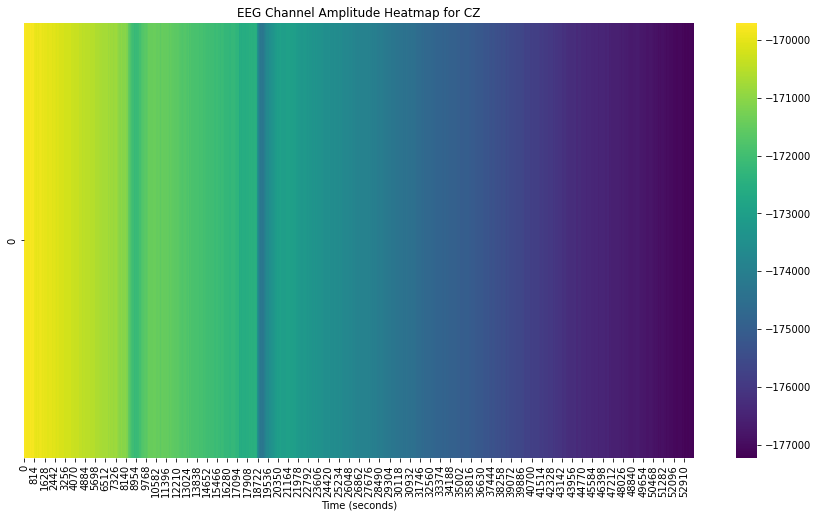

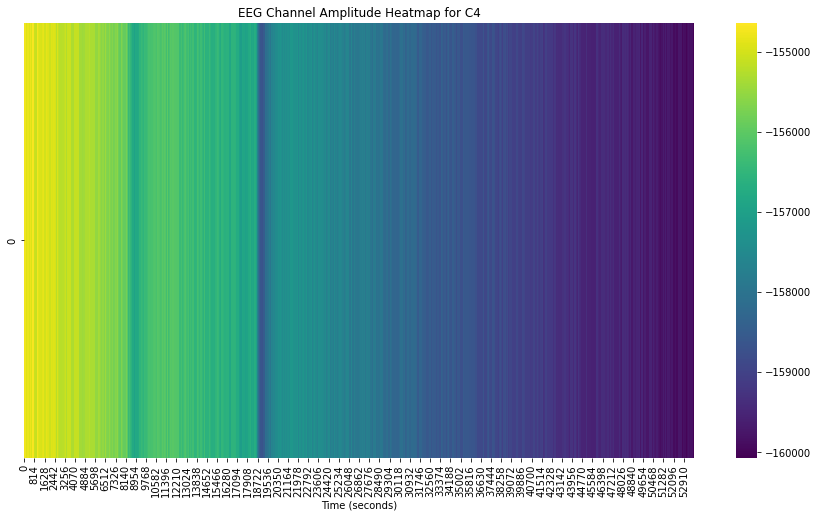

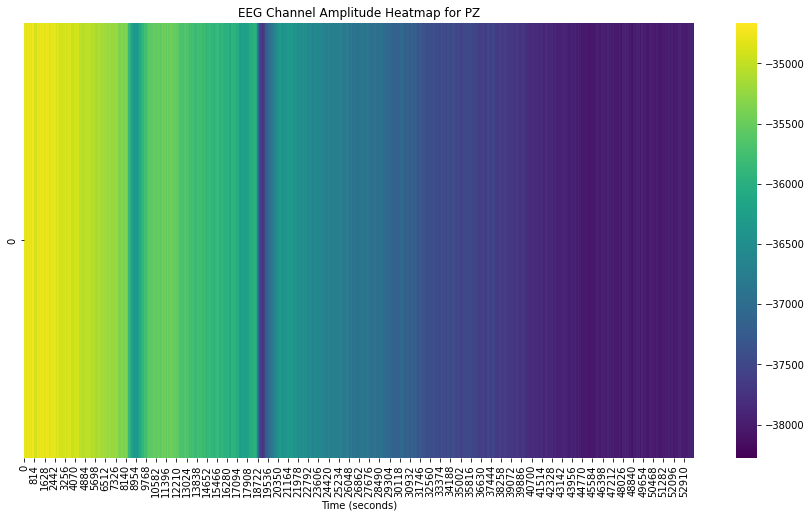

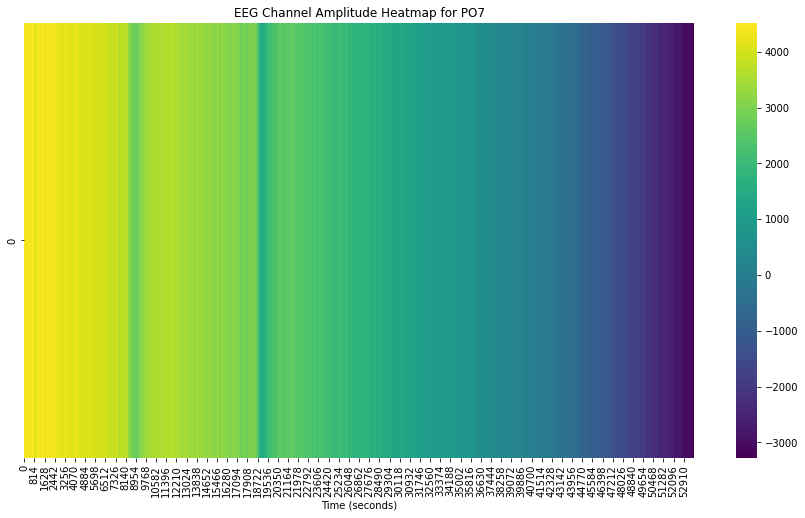

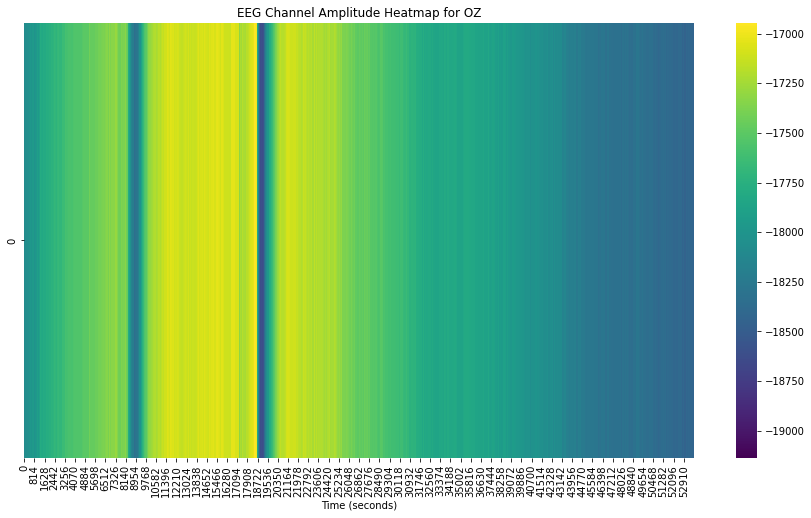

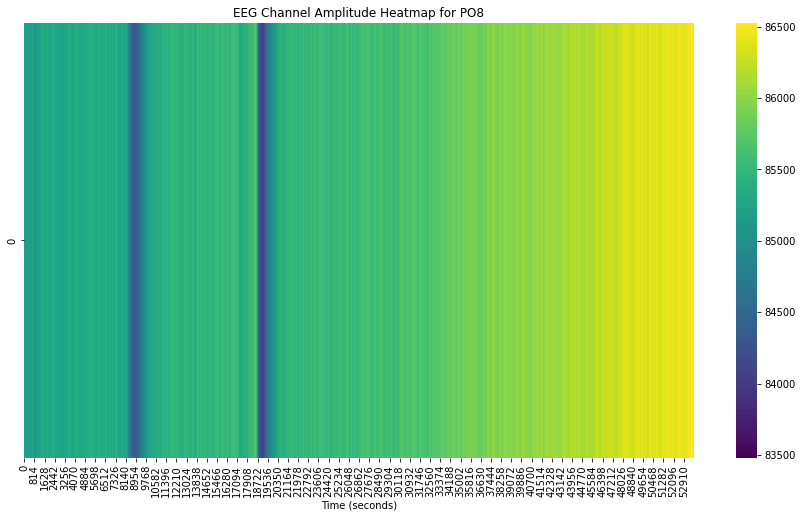

In [18]:
for i in range(0, 8):
    plot_heatmap(eeg_df[ch[i]])

In [19]:
import numpy as np
import pandas as pd

# Your data array
data = np.load('train/train/s1_d2_p002_002_data_time_stamps.npy')

# Reference date (Unix epoch)
reference_date = pd.Timestamp('1970-01-01')

# Convert days to timedelta and add to the reference date
datetimes = reference_date + pd.to_timedelta(data, unit='D')

print(datetimes)


DatetimeIndex(['2138-11-15 00:19:37.328649600',
                  '2138-11-15 00:25:24.721104',
               '2138-11-15 00:31:12.113644800',
               '2138-11-15 00:36:59.506099200',
                  '2138-11-15 00:42:46.898640',
               '2138-11-15 00:48:34.291094400',
               '2138-11-15 00:54:21.683635200',
               '2138-11-15 01:00:09.076089600',
               '2138-11-15 01:05:56.468630400',
               '2138-11-15 01:11:43.861084800',
               ...
               '2139-06-18 22:39:03.970684800',
               '2139-06-18 22:44:51.363139200',
                  '2139-06-18 22:50:38.755680',
               '2139-06-18 22:56:26.148134400',
               '2139-06-18 23:02:13.540675200',
               '2139-06-18 23:08:00.933129600',
               '2139-06-18 23:13:48.325670400',
               '2139-06-18 23:19:35.718124800',
               '2139-06-18 23:25:23.110665600',
                  '2139-06-18 23:31:10.503120'],
              dtype=

In [20]:
# If the values are in seconds since the Unix epoch
datetimes_seconds = pd.to_datetime(data, unit='s', origin='unix')

print(datetimes_seconds)

DatetimeIndex(['1970-01-01 17:07:59.013626488',
               '1970-01-01 17:07:59.017647235',
               '1970-01-01 17:07:59.021667981',
               '1970-01-01 17:07:59.025688728',
               '1970-01-01 17:07:59.029709474',
               '1970-01-01 17:07:59.033730221',
               '1970-01-01 17:07:59.037750967',
               '1970-01-01 17:07:59.041771714',
               '1970-01-01 17:07:59.045792460',
               '1970-01-01 17:07:59.049813207',
               ...
               '1970-01-01 17:11:34.943795956',
               '1970-01-01 17:11:34.947816703',
               '1970-01-01 17:11:34.951837449',
               '1970-01-01 17:11:34.955858196',
               '1970-01-01 17:11:34.959878942',
               '1970-01-01 17:11:34.963899689',
               '1970-01-01 17:11:34.967920435',
               '1970-01-01 17:11:34.971941182',
               '1970-01-01 17:11:34.975961928',
               '1970-01-01 17:11:34.979982675'],
              dtype=

In [21]:
len(datetimes_seconds)

53714